In [53]:
import numpy as np
import pandas as pd

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

#### Dataset:

https://www.sheffield.ac.uk/mash/statistics/datasets
    
This dataset contains information on new born babies and their parents. It contains mostly continuous variables (although some have only a few values e.g. number of cigarettes smoked per day) and is most useful for correlation and regression. The birthweights of the babies who mothers smoked have been adjusted slightly to exaggerate the differences between mothers who smoked and didn’t smoke so students can see the difference more clearly in a scatterplot with gestational age and scatter colour coded by smoking status

ID - Baby number

Length - Length of baby (inches)

Birthweight - Weight of baby (lbs)

Headcirc - Head Circumference

Gestation - Gestation (weeks)

smoker - Mother smokes 1 = smoker 0 = non-smoker

mage - Maternal age

mnocig - Number of cigarettes smoked per day by mother

mheight - Mothers height (inches)

mppwt - Mothers pre-pregnancy weight (lbs)

fage - Father's age

fedyrs - Father’s years in education

fnocig - Number of cigarettes smoked per day by father

fheight - Father's height (inches)

lowbwt - Low birth weight, 0 = No and 1 = yes

mage35 - Mother over 35, 0 = No and 1 = yes

In [54]:
birth_weight_data = pd.read_csv('datasets/Birthweight_reduced_kg_R.csv')

birth_weight_data.head()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
1,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0
2,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
3,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
4,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0


* Find the shape of the data,data type of individual columns

In [55]:
birth_weight_data.shape

(42, 16)

In [56]:
birth_weight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           42 non-null     int64  
 1   Length       42 non-null     int64  
 2   Birthweight  42 non-null     float64
 3   Headcirc     42 non-null     int64  
 4   Gestation    42 non-null     int64  
 5   smoker       42 non-null     int64  
 6   mage         42 non-null     int64  
 7   mnocig       42 non-null     int64  
 8   mheight      42 non-null     int64  
 9   mppwt        42 non-null     int64  
 10  fage         42 non-null     int64  
 11  fedyrs       42 non-null     int64  
 12  fnocig       42 non-null     int64  
 13  fheight      42 non-null     int64  
 14  lowbwt       42 non-null     int64  
 15  mage35       42 non-null     int64  
dtypes: float64(1), int64(15)
memory usage: 5.4 KB


* Check the presence of missing values

In [57]:
birth_weight_data.isnull().sum()

ID             0
Length         0
Birthweight    0
Headcirc       0
Gestation      0
smoker         0
mage           0
mnocig         0
mheight        0
mppwt          0
fage           0
fedyrs         0
fnocig         0
fheight        0
lowbwt         0
mage35         0
dtype: int64

* Describe the data

In [58]:
birth_weight_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,42.0,894.071429,467.616186,27.00,537.25,821.000,1269.5000,1764.00
Length,42.0,51.333333,2.935624,43.00,50.00,52.000,53.0000,58.00
Birthweight,42.0,3.312857,0.603895,1.92,2.94,3.295,3.6475,4.57
Headcirc,42.0,34.595238,2.399792,30.00,33.00,34.000,36.0000,39.00
Gestation,42.0,39.190476,2.643336,33.00,38.00,39.500,41.0000,45.00
smoker,42.0,0.523810,0.505487,0.00,0.00,1.000,1.0000,1.00
mage,42.0,25.547619,5.666342,18.00,20.25,24.000,29.0000,41.00
mnocig,42.0,9.428571,12.511737,0.00,0.00,4.500,15.7500,50.00
mheight,42.0,164.452381,6.504041,149.00,161.00,164.500,169.5000,181.00
mppwt,42.0,57.500000,7.198408,45.00,52.25,57.000,62.0000,78.00


In [59]:
birth_weight_data['smoker'].value_counts()

1    22
0    20
Name: smoker, dtype: int64

<AxesSubplot:xlabel='Birthweight', ylabel='Count'>

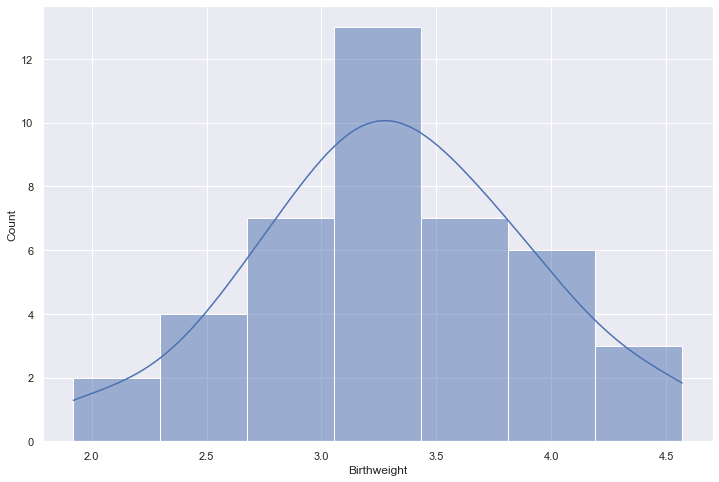

In [60]:
plt.figure(figsize = (12, 8))

sns.histplot(birth_weight_data['Birthweight'], kde = True)

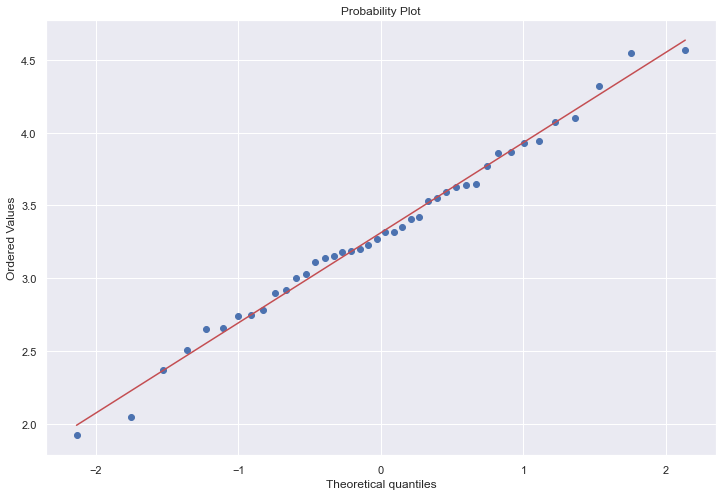

In [61]:
plt.figure(figsize = (12, 8))

stats.probplot(birth_weight_data['Birthweight'], dist = 'norm', plot = plt);

In [62]:
stats.shapiro(birth_weight_data['Birthweight'])

ShapiroResult(statistic=0.9899008274078369, pvalue=0.9684654474258423)

* Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages

#### Box Plot - Birth weight vs Smoker

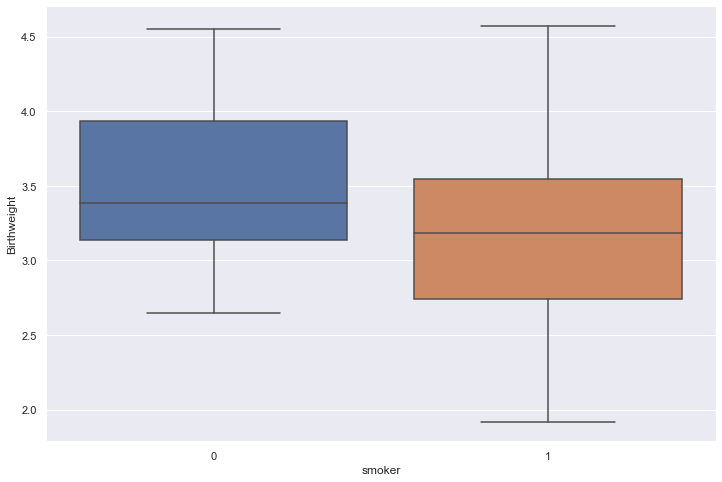

In [63]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=birth_weight_data, x='smoker', y='Birthweight')

plt.show()

* Making samples for the smoker categories

In [64]:
sample_01 = birth_weight_data[(birth_weight_data['smoker'] == 0)]

sample_02 = birth_weight_data[(birth_weight_data['smoker'] == 1)]

In [65]:
sample_01.shape, sample_02.shape

((20, 16), (22, 16))

* From above we can see that the number of samples are different. Let's make it same and then we can do the test

In [66]:
sample_02 = sample_02.sample(20)

sample_01.shape, sample_02.shape

((20, 16), (20, 16))

* Let's assume that following are our hypothesis testing

* __Null hypothesis (H0): u1 = u2, which translates to the mean of `sample_01` is equal to the mean of `sample_02`__
* __Alternative hypothesis (H1): u1 ? u2, which translates to the means of `sample_01` is not equal to `sample_02`__

#### Levene's test for homogeneity of variance

* The most common assessment for homogeneity of variance is Levene's test. The Levene's test uses an F-test to test the null hypothesis that the variance is equal across groups. A p value less than .05 indicates a violation of the assumption.

In [67]:
stats.levene(sample_01['Birthweight'], sample_02['Birthweight'])

LeveneResult(statistic=0.6851326489511107, pvalue=0.4129931327820482)

#### Independent t-test by using scipy.stats

In [68]:
stats.ttest_ind(sample_01['Birthweight'], sample_02['Birthweight'])

Ttest_indResult(statistic=2.1269397644916808, pvalue=0.03997649825582795)

### Head circumference vs. Smoker

<AxesSubplot:xlabel='Headcirc', ylabel='Count'>

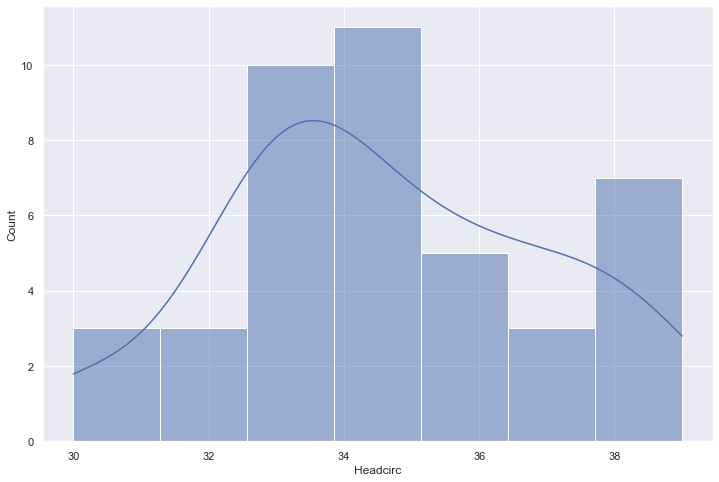

In [69]:
plt.figure(figsize = (12, 8))

sns.histplot(birth_weight_data['Headcirc'], kde = True)

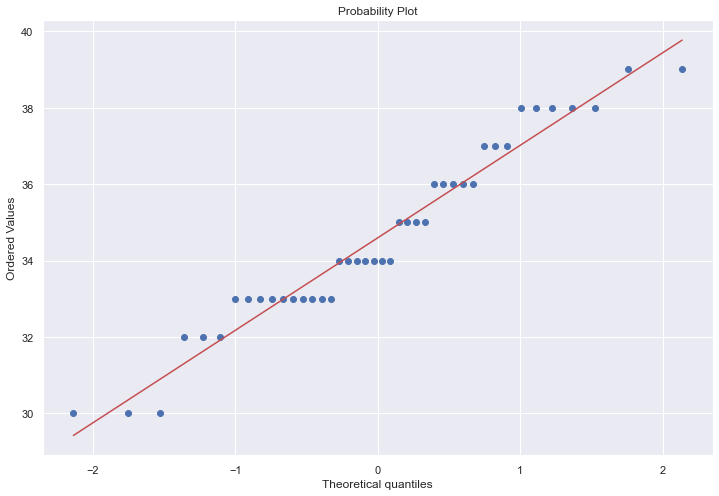

In [70]:
plt.figure(figsize = (12, 8))

stats.probplot(birth_weight_data['Headcirc'], dist = 'norm', plot = plt);

In [71]:
stats.shapiro(birth_weight_data['Headcirc'])

ShapiroResult(statistic=0.9504274129867554, pvalue=0.06690217554569244)

<AxesSubplot:xlabel='smoker', ylabel='Headcirc'>

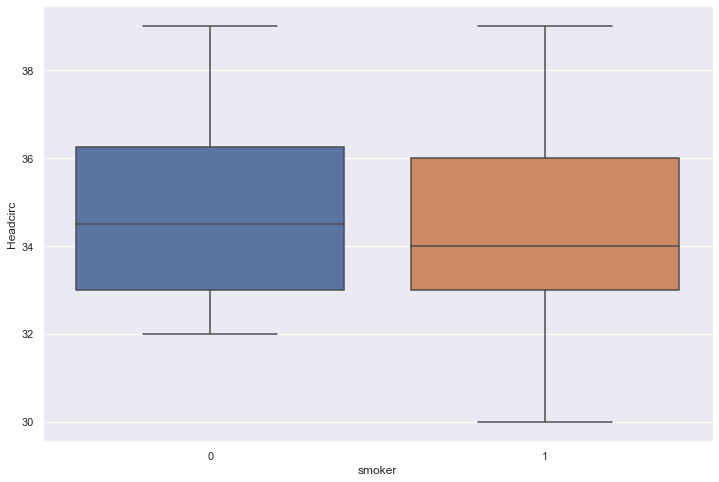

In [72]:
plt.figure(figsize=(12, 8))

sns.boxplot(y=birth_weight_data['Headcirc'], x=birth_weight_data['smoker'])

In [73]:
stats.levene(sample_01['Headcirc'], sample_02['Headcirc'])

LeveneResult(statistic=0.7765006385696037, pvalue=0.3837532721628545)

In [74]:
stats.ttest_ind(sample_01['Headcirc'], sample_02['Headcirc'])

Ttest_indResult(statistic=1.314556278094053, pvalue=0.19653829291181862)